In [157]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 

In [158]:
ticker = 'EURINR=X'
start_date = '2023-01-01'
end_date = '2024-09-30'

In [159]:
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [160]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
Date,,,,,,
2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0


In [162]:
# Reset the index to convert the Date index into a column
data.reset_index(inplace=True)

In [163]:
data.head()

Price,index,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
0,0,2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
1,1,2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2,2,2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
3,3,2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
4,4,2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   (index, )              455 non-null    int64              
 1   (Date, )               455 non-null    datetime64[ns, UTC]
 2   (Adj Close, EURINR=X)  455 non-null    float64            
 3   (Close, EURINR=X)      455 non-null    float64            
 4   (High, EURINR=X)       455 non-null    float64            
 5   (Low, EURINR=X)        455 non-null    float64            
 6   (Open, EURINR=X)       455 non-null    float64            
 7   (Volume, EURINR=X)     455 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 28.6 KB


In [165]:
# checking for duplicates
print('Number of duplicated rows are ',data.duplicated().sum())

Number of duplicated rows are  0


In [166]:
# checking for missing values
data.isnull().sum()

Price      Ticker  
index                  0
Date                   0
Adj Close  EURINR=X    0
Close      EURINR=X    0
High       EURINR=X    0
Low        EURINR=X    0
Open       EURINR=X    0
Volume     EURINR=X    0
dtype: int64

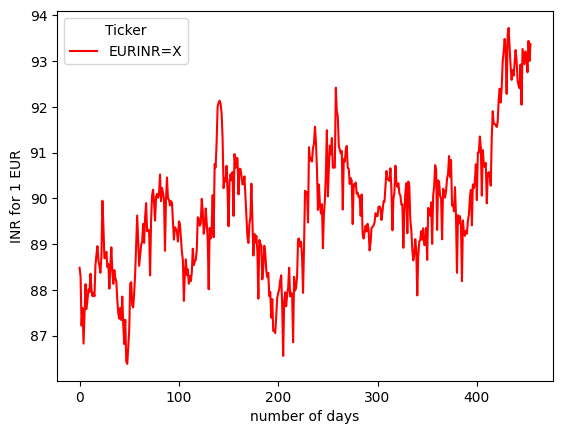

In [167]:
data['Close'].plot.line(color='red')
plt.xlabel('number of days')
plt.ylabel('INR for 1 EUR')
plt.show()

## FEATURE ENGINEERING

In [168]:
# adding previous 3 closing prices in each row
data['Close_last1']=data['Close'].shift(1)
data['Close_last2']=data['Close'].shift(2)
data['Close_last3']=data['Close'].shift(3)

In [169]:
print('Shape of data is ',data.shape)

Shape of data is  (455, 11)


In [170]:
#removing the first 3 rows which contain NaN values
df=data.dropna()

In [171]:
print('Shape of the data after removing the NaN values is ',df.shape)

Shape of the data after removing the NaN values is  (452, 11)


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 3 to 454
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   (index, )              452 non-null    int64              
 1   (Date, )               452 non-null    datetime64[ns, UTC]
 2   (Adj Close, EURINR=X)  452 non-null    float64            
 3   (Close, EURINR=X)      452 non-null    float64            
 4   (High, EURINR=X)       452 non-null    float64            
 5   (Low, EURINR=X)        452 non-null    float64            
 6   (Open, EURINR=X)       452 non-null    float64            
 7   (Volume, EURINR=X)     452 non-null    int64              
 8   (Close_last1, )        452 non-null    float64            
 9   (Close_last2, )        452 non-null    float64            
 10  (Close_last3, )        452 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(8), int64(2)
memory usage: 4

## Splitting the data

In [173]:
X=df[['Close_last1','Close_last2','Close_last3']]
y=df['Close']

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [175]:
print(f'Shapes of X_train and X_test are {X_train.shape}, {X_test.shape} respectively\nShapes of y_train and y_test are {y_train.shape}, {y_test.shape} respectively')

Shapes of X_train and X_test are (361, 3), (91, 3) respectively
Shapes of y_train and y_test are (361, 1), (91, 1) respectively


## Decision Tree Regressor 

In [273]:
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [274]:
# predicting the prices for one week from sep 30 2024
predicted_prices=[]

In [275]:
last_known_values=X.iloc[-1].values.reshape(1,-1)
print(last_known_values)

[[93.00099945 93.43800354 92.7539978 ]]


In [276]:
for i in range(7):
    next_close=model.predict(last_known_values)[0]
    predicted_prices.append(next_close)
    # Update the last known value by adding the latest prediction and removing the oldest price
    last_known_values = [[next_close, last_known_values[0][0], last_known_values[0][1]]]

In [277]:
dates = pd.date_range(start='2024-10-01 00:00:00', periods=7, freq='D',normalize=False)
predicted_df = pd.DataFrame({'Date': dates, 'Close': predicted_prices})
print("Predicted Closing Prices from October 1 to October 7, 2024:")
print(predicted_df)

Predicted Closing Prices from October 1 to October 7, 2024:
        Date      Close
0 2024-10-01  93.367996
1 2024-10-02  93.722000
2 2024-10-03  92.574997
3 2024-10-04  92.877998
4 2024-10-05  93.438004
5 2024-10-06  93.481003
6 2024-10-07  92.280098


In [278]:
data['Date'] = pd.to_datetime(data['Date'])

In [279]:
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'])

In [280]:
original_data=data[['Date','Close']]
original_data.columns = ['Date', 'Close']
predicted_df.columns = ['Date', 'Close']

In [312]:
original_data

,Date,Close
0,2023-01-02,88.482002
1,2023-01-03,88.300003
2,2023-01-04,87.219002
3,2023-01-05,87.605003
4,2023-01-06,86.827003
...,...,...
450,2024-09-23,93.110001
451,2024-09-24,92.753998
452,2024-09-25,93.438004
453,2024-09-26,93.000999


In [313]:
combined_data = pd.concat([original_data, predicted_df], ignore_index=True)

In [314]:
combined_data.sort_values(by='Date', inplace=True)

In [315]:
combined_data

,Date,Close
0,2023-01-02,88.482002
1,2023-01-03,88.300003
2,2023-01-04,87.219002
3,2023-01-05,87.605003
4,2023-01-06,86.827003
...,...,...
457,2024-10-03,92.574997
458,2024-10-04,92.877998
459,2024-10-05,93.438004
460,2024-10-06,93.481003


## Moving Average

In [316]:
# Calculate Moving Average (20-day Moving Average)
combined_data['MA_20'] = combined_data['Close'].rolling(window=20).mean()

## Bollinger Bands

In [317]:
# Calculate Bollinger Bands
combined_data['Upper_Band'] = combined_data['MA_20'] + (combined_data['Close'].rolling(window=20).std() * 2)
combined_data['Lower_Band'] = combined_data['MA_20'] - (combined_data['Close'].rolling(window=20).std() * 2)

## Commodity Channel Index(CCI)

In [318]:
combined_data['Mean_Deviation']=combined_data['Close'].rolling(window=20).std()
#Assuming Typical price as closing price
combined_data['CCI'] = (
    (combined_data['Close'] - combined_data['MA_20']) /
    (0.015 * combined_data['Mean_Deviation']))

In [319]:
final_columns = ['Date', 'Close', 'MA_20', 'Upper_Band', 'Lower_Band', 'CCI']
final_data = combined_data[final_columns]

In [320]:
final_data

,Date,Close,MA_20,Upper_Band,Lower_Band,CCI
0,2023-01-02,88.482002,NaN,NaN,NaN,NaN
1,2023-01-03,88.300003,NaN,NaN,NaN,NaN
2,2023-01-04,87.219002,NaN,NaN,NaN,NaN
3,2023-01-05,87.605003,NaN,NaN,NaN,NaN
4,2023-01-06,86.827003,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
457,2024-10-03,92.574997,92.974350,93.788794,92.159905,-65.378315
458,2024-10-04,92.877998,92.969650,93.785235,92.154064,-14.983282
459,2024-10-05,93.438004,92.979550,93.813553,92.145547,73.293714
460,2024-10-06,93.481003,93.002550,93.866210,92.138889,73.864369


In [322]:
# Data from Oct 1 to Oct 7
final_data.iloc[455:,:]

,Date,Close,MA_20,Upper_Band,Lower_Band,CCI
455,2024-10-01,93.367996,92.933450,93.661348,92.205551,79.598323
456,2024-10-02,93.722000,92.979500,93.784560,92.174440,122.972210
457,2024-10-03,92.574997,92.974350,93.788794,92.159905,-65.378315
458,2024-10-04,92.877998,92.969650,93.785235,92.154064,-14.983282
459,2024-10-05,93.438004,92.979550,93.813553,92.145547,73.293714
460,2024-10-06,93.481003,93.002550,93.866210,92.138889,73.864369
461,2024-10-07,92.280098,92.987805,93.891348,92.084261,-104.434266
